# Grupo 7 - cohorte 2

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [29]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [30]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [31]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [32]:
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

### Respuesta

1. El conjunto de datos contiene 506 entradas que representan información agregada acerca de 14 variables (numéricas y categóricas) que describen determinadas características relacionadas con localidades de la ciudad de Boston, y con las viviendas que existen en cada una.

2. La variable objetivo a predecir se denomina "target" (objetivo). Esta representa la mediana de los precios de las viviendas ocupadas por sus propietarios en cada localidad de la ciudad. La misma está expresada en miles de dólares.

3. El dataset presenta 13 atributos (variables numéricas y categóricas) disponibles para predecir la mediana del precio de los valores de la vivienda por localidad. A continuación, se detallan los atributos disponibles:

* CRIM: Tasa de criminalidad per cápita por localidad
* ZN: Proporción de tierra residencial dividida en zonas para lotes de más de 25000 pies cuadrados
* INDUS: Proporción de acres de negocios no minoristas por ciudad
* CHAS: Variable ficticia Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
* NOX: Concentración de óxidos nítricos NOX (partes por 10 millones)
* RM: Promedio de habitaciones por vivienda
* AGE: Proporción de las viviendas ocupadas por el propietario construidas antes de 1940
* DIS: Distancias ponderadas a cinco centros de empleo de Boston
* RAD: Índice de accesibilidad a carreteras radiales
* TAX: Tasa de impuesto a la propiedad (valor total) cada $10000
* PTRATIO: Relación alumno-profesor por localidad
* B:  1000(Bk - 0.63)^2 donde Bk es la proporción de negros por localidad
* LSTAT: % de la población de estatus bajo

4. Con sólo ver la descripción de los atributos, imaginamos que los atributos LSTAT (% de la población de estatus bajo) y RM (promedio de habitaciones por vivienda) serán determinantes para la predicción de los valores de la variable objetivo (mediana de los precios de los valores de las viviendas por localidad).

5. Llama particular atención el atributo llamado "B". Este contiene valores que son la salida de una función que incluye un parámetro llamado "Bk", el cual es la proporción de personas de raza negra por localidad. La inclusión de este parámetro implica un claro dilema ético. Una explicación posible es que la sola presencia del mismo indica un sesgo ideológico del creador del dataset, ya que asume que la presencia de personas de raza negra puede inlfuir en la predición de los precios de las viviendas. Otra explicación puede ser que la inclusión de este parámetro se hace justamente para verificar la existencia de actitudes racistas por parte de los formadores de precios de las viviendas.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

### Respuesta 2

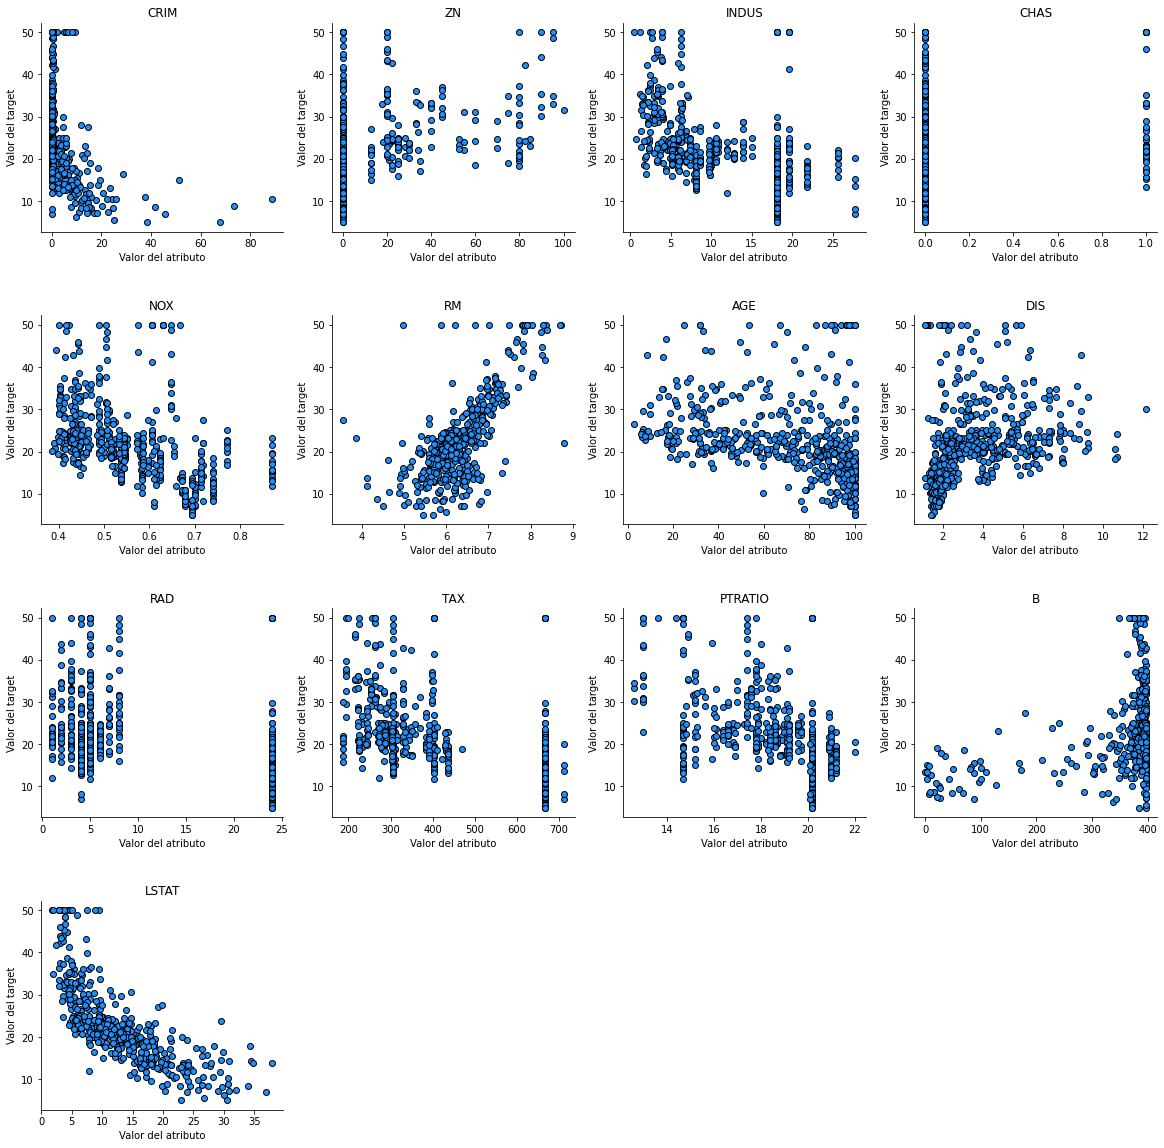

In [33]:
# 1.
fig = plt.figure(figsize = (20, 20))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
i = 1
for feature in boston['feature_names']:
    selector = (boston['feature_names'] == feature)
    ax = fig.add_subplot(4, 4, i)
    ax.title.set_text(feature)
    plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.ylabel("Valor del target")
    plt.xlabel("Valor del atributo")
    i = i + 1

sb.despine()
plt.show()

### Respuestas 2 y 3

A ojo, hipotetizamos que los atributos que más informativos serán para realizar la predicción serán aquellos que visualmente presentan correlaciones (lineales o no lineales) con la variable a predecir. Por lo tanto, deberían observarse patrones al graficar la nube de puntos. A continuación se detalla una lista en orden descendente de importancia (a ojo, los primeros atributos serán más informativos que los últimos):

1.   RM
2.   LSTAT
3.   DIS
4.   RAD
5.   CRIM
6.    NOX
7.   TAX
8.   INDUS
9.    PTRATIO
10.  ZN
11.  AGE
12.   B
13.  CHAS

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

### Respuestas 1-4

Si bien se podría elegir un solo atributo (por ejemplo, el que visualmente observemos que puede ser más informativo para predecir la variable "target"), mediante un `for` instanciamos regresiones lineales con todos los atributos del dataset, de a uno por vez. De esta forma, podremos elegir al atributo más informativo para predecir los valores de la variable target.

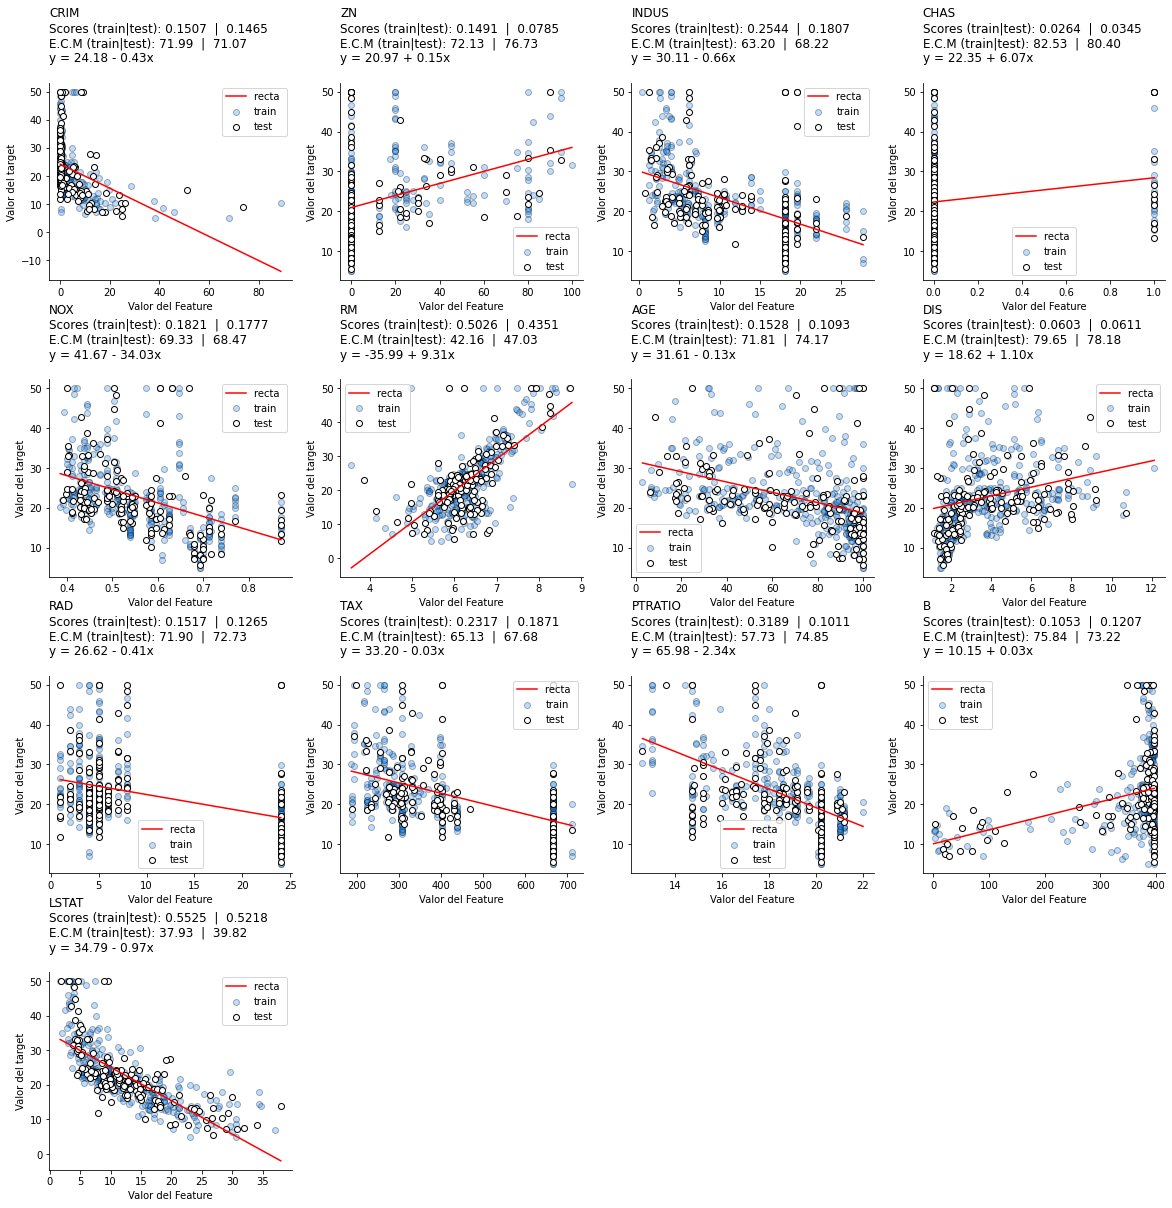

In [34]:
fig = plt.figure(figsize = (20, 20))
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)
i = 1

for feature in boston['feature_names']:
    # obtiene el nombre de la columna feature
    selector = (boston['feature_names'] == feature)

    # extrae matriz de valores segun columna
    X_train_f = X_train[:, selector]
    X_test_f = X_test[:, selector]
    
    # se crea modelo y entrana con "fit"
    lin_model = LinearRegression()
    lin_model.fit(X_train_f, y_train)

    # se crean dos array (vectores) con el valor predicho para train y test
    y_trn_predict = lin_model.predict(X_train_f)
    y_predict = lin_model.predict(X_test_f)

    # Guardo la información del modelo en el título de cada gráfico
    slope_sign = " + " if lin_model.coef_[0] > 0 else " - "
    mod_info = feature + "\n" + \
               "Scores (train|test): " +  "{:.4f}".format(lin_model.score(X_train_f, y_train,)) + "  |  " + \
                                          "{:.4f}".format(lin_model.score(X_test_f, y_test,)) + "\n" + \
               "E.C.M (train|test): " + "{:.2f}".format(mean_squared_error(y_train, y_trn_predict)) + "  |  " + \
                                        "{:.2f}".format(mean_squared_error(y_test, y_predict)) + "\n" + \
               "y = " + "{:.2f}".format(lin_model.intercept_) + slope_sign + "{:.2f}".format(abs(lin_model.coef_[0])) + "x" + "\n" 
    
    # Gráfico      
    ax = fig.add_subplot(4, 4, i)
    plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train", alpha=0.3)
    plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

    x_min = X[:, boston['feature_names'] == feature].min()
    x_max = X[:, boston['feature_names'] == feature].max()

    b = lin_model.intercept_
    a = lin_model.coef_[0]
    # Recta
    plt.plot([x_min,x_max], [ x_min * a + b , a * x_max + b], color="red",label="recta ")
    plt.xlabel("Valor del Feature")
    plt.ylabel("Valor del target")
    plt.title(mod_info, loc = "left")
    plt.legend()
    
    i = i + 1

sb.despine()
plt.show()

### Respuesta 5

Podemos observar que los atributos que mejor se ajustan a una relación lineal con la variable target son los atributos RM y LSTAT, ya que ambos obtienen valores de error menores a 50 (tanto para train como para test). Para el caso RM, y como era intuitivamente esperable, la relación es directa ya que a mayor numero de habitaciones en la propiedad, mayor es el precio de esta. Para el atributo LSTAT, en cambio, la relación es inversa ya que a menor poder adquisitivo de las personas de la localidad, se observa un menor precio de las viviendas. Sin embargo, al analizar la recta y los puntos, se observa que una regresión lineal no es lo más adecuado para predecir el valor de la variable target. La recta subestima los valores de la variable dependiente a valores bajos y altos de la variable independiente. Algo similar puede observarse para el ajuste de la recta para el atributo RM.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

A continuación, nos centraremos únicamente en el atributo "RM" e instanciaremos y entrenaremos una regresión polinomial.

### Respuesta 1

In [35]:
# Se crean las listas a rellenar
_lst_x = []
_lst_mse_trn = []
_lst_mse_tst = []

print("Error cuadrático medio ('E.C.M') de las regresiones polinomiales para el atributo 'RM', según su grado\n")
feature = 'RM'
selector = (boston['feature_names'] == feature)
cant_degree = 5
for i in range (cant_degree):
    degree = i + 1
    X_train_f = X_train[:, selector]
    X_test_f = X_test[:, selector]

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)

    y_trn_pred = model.predict(X_train_f)
    y_pred = model.predict(X_test_f)
        
    _score_trn = model.score(X_train_f,y_train)
    _score_tst = model.score(X_test_f,y_test)
    
    # Se guardan los valores de errores en listas
    _lst_mse_trn.append(mean_squared_error(y_train, y_trn_pred))
    _lst_mse_tst.append(mean_squared_error(y_test, y_pred))
    _lst_x.append(degree)

    # Se imprimen los errores para cada grado
    out = "Grado = " + str(i) + "\n" + "E.C.M (train|test): "  + \
          "{:.2f}".format(mean_squared_error(y_train, y_trn_pred)) + " | " + \
          "{:.2f}".format(mean_squared_error(y_test, y_pred)) + "\n"
    print(out)

Error cuadrático medio ('E.C.M') de las regresiones polinomiales para el atributo 'RM', según su grado

Grado = 0
E.C.M (train|test): 42.16 | 47.03

Grado = 1
E.C.M (train|test): 36.95 | 40.87

Grado = 2
E.C.M (train|test): 35.32 | 41.22

Grado = 3
E.C.M (train|test): 33.54 | 42.42

Grado = 4
E.C.M (train|test): 31.93 | 41.24



### Respuesta 2

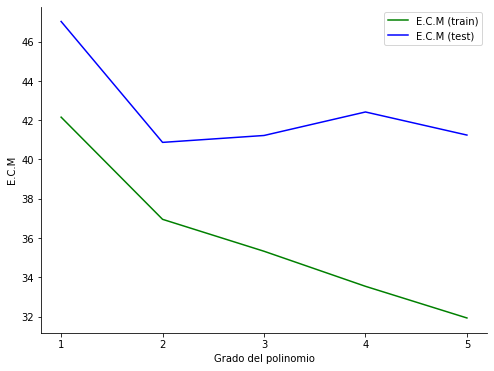

In [36]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(8,6))
plt.xticks(_lst_x)
plt.plot(_lst_x, _lst_mse_trn, color="green", label="E.C.M (train)")
plt.plot(_lst_x, _lst_mse_tst, color="blue", label="E.C.M (test)")
plt.xlabel("Grado del polinomio")
plt.ylabel("E.C.M")
plt.legend()
sb.despine()
plt.show()

### Respuesta 3-5

Se puede ver que el error cuadrático medio disminuye para polinomios de grado 1 a 2, pero el sobreajuste comienza para polinomios de grados mayores a 3 ya que el error para el set de test asciende. El mejor ajuste se obtiene para un polinomio de grado 2 ya que se obtiene el menor error en el set de test, que es lo interesa para obtener buenos modelos predictivos.

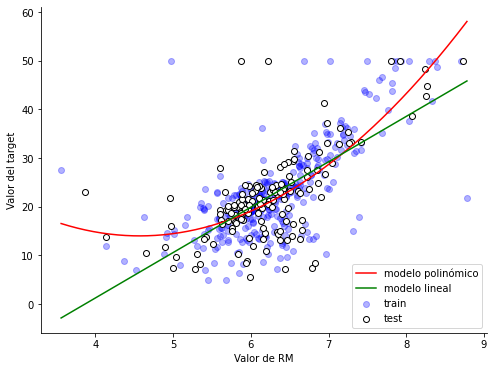

In [37]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 354).reshape(-1, 1)

degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train);

# Gráfico
plt.figure(figsize=(8,6))
plt.scatter(X_train_f, y_train, color="blue", label="train", alpha=0.3)
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x), color="red", label="modelo polinómico")
plt.plot([x_start,x_end], [9.31 * x_start - 35.99 , 9.31 * x_end - 35.9], color="green", label="modelo lineal")
plt.xlabel("Valor de RM")
plt.ylabel("Valor del target")
plt.legend()
sb.despine()
plt.show()

Podemos observar que el ajuste polinomial de grado 2 funciona mejor que el lineal ya que obtenemos un error de Test menor, de 40.8 aproximadamente (ver respuesta 1 de este ejercicio), frente a un error de test aproximado de 46.9 dado por la regresion lineal (ver gráfico correspondiente al atributo RM en la respuesta 1-4 del ejercicio 3).

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

### Respuestas 1 y 2

A continuación, elegimos dos de los atributos que creemos son los más informativos para predecir la variable target: RM y LSTAT.

In [38]:
# Seleccionamos los dos atrubitos mencioandos
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((354, 2), (152, 2))

In [39]:
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

    # Se imprimen los errores para cada grado
    out = "Grado = " + str(degree) + "\n" + "E.C.M (train|test): "  + \
          "{:.2f}".format(mean_squared_error(y_train, y_train_pred)) + " | " + \
          "{:.2f}".format(mean_squared_error(y_test, y_test_pred)) + "\n"
    print(out)

Grado = 1
E.C.M (train|test): 29.59 | 32.73

Grado = 2
E.C.M (train|test): 19.20 | 23.81

Grado = 3
E.C.M (train|test): 17.66 | 24.18

Grado = 4
E.C.M (train|test): 14.09 | 33.48

Grado = 5
E.C.M (train|test): 12.88 | 37.23



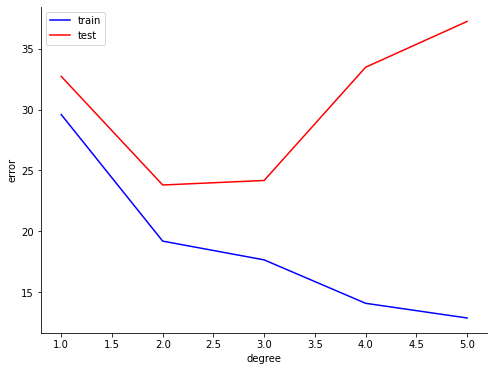

In [40]:
# Gráfico
plt.figure(figsize=(8,6))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
sb.despine()
plt.show()

### Respuesta 3

Se observa que la regresión polinómica de grado 2 devuelve el menor error de test (23.81). Este modelo es más predictivo que el modelo calculado anteriormente con una sola variable (RM), ya que el error de test (23.81) es bastante menor que el error de test del modelo a un solo atributo (40.87 para la regresión polinómica de grado 2). En otras palabras, la incorporación de dos atributos al modelo explican de una mejor manera la variabilidad de los valores de la variable target, lo que indicaría que ambas variables tienen cierto grado de independencia (en caso contrario, es decir que fueran totalmente dependientes, el modelo no debería haber mejorado en su capacidad predictiva).

## Más ejercicios (opcionales)


### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

#### Respuesta

In [ ]:
# Se incluyen todas las columnas (atributos) de la matriz X_train
X_train_f = X_train[:, :]
X_test_f = X_test[:, :]
X_train_f.shape, y_train.shape,  X_test_f.shape, y_test.shape

((354, 13), (354,), (152, 13), (152,))

In [ ]:
# Modelos
cant_degree = 7

for i in range(cant_degree):
    
    degree = i + 1

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)

    y_pred = model.predict(X_test_f)
    
    # Se imprimen los errores para cada grado
    out = "Grado = " + str(degree) + "\n" + "E.C.M (train|test): "  + \
          "{:.2f}".format(mean_squared_error(y_train, y_trn_pred)) + " | " + \
          "{:.2f}".format(mean_squared_error(y_test, y_pred)) + "\n"
    print(out)

Grado = 1
E.C.M (train|test): 31.93 | 27.20

Grado = 2
E.C.M (train|test): 31.93 | 29.00

Grado = 3
E.C.M (train|test): 31.93 | 85912.08

Grado = 4
E.C.M (train|test): 31.93 | 546667.22

Grado = 5
E.C.M (train|test): 31.93 | 14811.52

Grado = 6
E.C.M (train|test): 31.93 | 31415.07



Para todos los features, el modelo con grado de polinomio igual a 1 es el que arroja menor error cuadrático media del set de test, aunqu muy similar al obtenido para la regresión polinómica de grado 2. Se observa que a medida que se suman grados el modelo tiene un sobreajuste y el error del set de test se hace cada vez más grande, por lo que pierde su capacidad predictiva.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

A continuación, entrenamos y evaluamos regresiones lineales con rgularización "ridge". Aplicamos la función `Ridge` con distintos valores de alpha elegidos arbitrariamente desde prácticamente 0 a 1000, para el feature RM.

In [41]:
selector = (boston['feature_names'] == 'RM') 
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]

In [100]:
slopes = []
mse_train = []
mse_test = []

alpha_val = [0.001, 0.01, 0.1, 1, 10, 50, 100, 500, 1000]
for i in alpha_val:
  rr = linear_model.Ridge(alpha=i)
  rr.fit(X_train_f, y_train)
  slp = rr.coef_
  y_train_pred = rr.predict(X_train_f)
  y_test_pred = rr.predict(X_test_f)
  _mse_train = mean_squared_error(y_train, y_train_pred)
  _mse_test = mean_squared_error(y_test, y_test_pred)
  mse_train.append(_mse_train)
  mse_test.append(_mse_test)
  slopes.append(slp)
  print(f"Alpha = {i} \n ECM (train) = {_mse_train} \n ECM (test)  = {_mse_test} \n Coeficientes {rr.coef_} \n")

Alpha = 0.001 
 ECM (train) = 42.15765086453009 
 ECM (test)  = 47.033010672214026 
 Coeficientes [9.31127454] 

Alpha = 0.01 
 ECM (train) = 42.157651003892376 
 ECM (test)  = 47.03267955165401 
 Coeficientes [9.31079285] 

Alpha = 0.1 
 ECM (train) = 42.15766492558174 
 ECM (test)  = 47.02938291412061 
 Coeficientes [9.3059787] 

Alpha = 1 
 ECM (train) = 42.159042679066864 
 ECM (test)  = 46.99785782202706 
 Coeficientes [9.25810955] 

Alpha = 10 
 ECM (train) = 42.283547327680274 
 ECM (test)  = 46.81242801594673 
 Coeficientes [8.80517879] 

Alpha = 50 
 ECM (train) = 44.28120266603485 
 ECM (test)  = 47.753453575261155 
 Coeficientes [7.23257319] 

Alpha = 100 
 ECM (train) = 47.83430369697378 
 ECM (test)  = 50.44301323208384 
 Coeficientes [5.91258748] 

Alpha = 500 
 ECM (train) = 65.60782516260349 
 ECM (test)  = 66.02448679115037 
 Coeficientes [2.40344642] 

Alpha = 1000 
 ECM (train) = 73.07270026553456 
 ECM (test)  = 72.87830344648704 
 Coeficientes [1.37980077] 



Graficamos los errores cuadráticos medios para el set de train/test, así también como los valores de las pendientes para cada valor de alpha. Aplicamos logaritmo a los valores de alpha para obtener una mejor visualización.

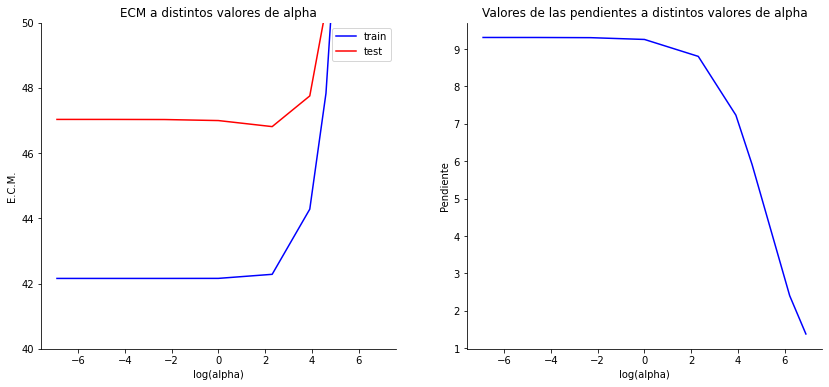

In [104]:
# Gráfico

fig = plt.figure(figsize = (14, 6))
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)

ax = fig.add_subplot(1, 2, 1)
plt.plot(np.log(alpha_val), mse_train, color="blue", label="train")
plt.plot(np.log(alpha_val), mse_test, color="red", label="test")
plt.legend()
plt.xlabel("log(alpha)")
plt.ylabel("E.C.M.")
plt.title("ECM a distintos valores de alpha")
plt.ylim((40, 50))
sb.despine()

ax = fig.add_subplot(1, 2, 2)
plt.plot(np.log(alpha_val), slopes, color="blue", label="train")
plt.xlabel("log(alpha)")
plt.ylabel("Pendiente")
plt.title("Valores de las pendientes a distintos valores de alpha")
sb.despine()
plt.show()

En la escala logarítmica de alpha, se observa un quiebre en el error cuadrático medio a valores de log(alpha) de aproximadamente 2, a partir del cual el error cuadrático medio asciende abruptamente. Para determinar el valor de alpha evaluado, aplicamos exponencial a ese valor para obtener el valor de alpha original:

In [98]:
np.exp(2)

7.38905609893065

Entonces, observamos que para un valor de alpha aproximado de 7, se obtienen resultados muy similares a los de una regresión lineal sin penalización (alpha = 0), o incluso levemente mejores, y se penaliza el valor de coeficientes demasiado grandes (el valor de la pendiente se reduce un poco).

A continuación, comparamos los valores de error cuadrático medio para valores de alpha iguales a 0 (idéntico a una regresión lineal sin penalización) y a 7.

In [102]:
rr_0 = linear_model.Ridge(alpha = 0)
rr_0.fit(X_train_f, y_train)
y_train_pred = rr_0.predict(X_train_f)
y_test_pred = rr_0.predict(X_test_f)
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(42.15765086312224, 47.03304747975518)

In [103]:
rr_7 = linear_model.Ridge(alpha = 7)
rr_7.fit(X_train_f, y_train)
y_train_pred = rr_7.predict(X_train_f)
y_test_pred = rr_7.predict(X_test_f)
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(42.22140243868095, 46.849895180108106)

Se observa una pequeña mejora en el valor de error cuadrático medio en el set de test cuando alpha es igual a 7 (es decir, el modelo con alpha = 7 predice mejor).